# **Autism Spectrum Disorder (ASD) Prediction**
***
## **1 Project Topic**

 - **Overview**: This project aims to predict Autism Spectrum Disorder (ASD) using machine learning models. ASD is a neurodevelopmental disorder with challenges in social communication and repetitive behaviors. Traditional diagnostic methods are resource-intensive and subjective, which creates a need for more efficient, data-driven approaches.

 - **Machine Learning Approach**: Supervised learning algorithms are applied to the task of binary classification (predicting ASD or not). The models include K-Nearest Neighbor (KNN), Decision Tree, Support Vector Machines (SVM), Random Forest, Gradient Boosting, and Artificial Neural Network (ANN).

 - **Motivation**: The goal is to create a scalable, cost-effective tool to assist in early ASD diagnosis, which can lead to better outcomes through timely intervention and alleviate healthcare burdens. Data mining provides an objective alternative to complement traditional diagnostic methods.
***

## **2 Data**

- **Acquisition**:  The dataset used in this project is publicly available and sourced from the Autism Research group at the University of Arkansas Computer Science Department. It was retrieved from Kaggle (Madhuri, 2022).

- **Description**: The dataset contains 1985 samples and 28 columns, including both categorical and numerical data. It is a single-table dataset and does not combine multiple data sources.
ues as 0 or 1 only.







  <br>**Reference**
  <br>Madhuri, U. L. (2022). "ASD children traits," Kaggle. Retrieved from https://www.kaggle.com/datasets/uppulurimadhuri/dataset/data. Accessed on September 7, 2024.
***

### **Import Libraries**

In [26]:
import pandas as pd # data processing
import numpy as np # linear algebra
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, auc, f1_score, roc_auc_score
import tensorflow as tf
import time
import warnings
warnings.filterwarnings("ignore")

### **Read Data**

In [27]:
# Download the dataset and read the data
df = pd.read_csv('C:/Users/User/Downloads/data_csv.csv')
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [28]:
# Shape of DataFrame
df.shape

(1985, 28)

In [29]:
# Statistical information of data
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.00,573.16,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.21,0.41,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.27,0.45,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.28,0.45,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.31,0.46,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.26,0.44,0.0,0.0,0.0,1.0,1.0


In [30]:
# DataType and values of each feature
pd.DataFrame({
    'Column': df.columns,
    'DataType': df.dtypes.values,
    'UniqueValues': [df[col].unique() for col in df.columns],
    'UniqueValuesCount': df.nunique().values
})

,Column,DataType,UniqueValues,UniqueValuesCount
0,CASE_NO_PATIENT'S,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1985
1,A1,int64,"[0, 1]",2
2,A2,int64,"[0, 1]",2
3,A3,int64,"[0, 1]",2
4,A4,int64,"[0, 1]",2
5,A5,int64,"[0, 1]",2
6,A6,int64,"[0, 1]",2
7,A7,int64,"[1, 0]",2
8,A8,int64,"[1, 0]",2
9,A9,int64,"[0, 1]",2


***
## **3 Data Cleaning**

### **Step 1: Checking unique values in categorical features**

1. **Inconsistent Labels**: We found inconsistent labels in **'Who_completed_the_test'** and **'Ethnicity'** (e.g., case differences). These inconsistencies could confuse the model.

2. **Renaming**: Labels were standardized to ensure consistency and accurate analysis.

In [31]:
for col in ['Who_completed_the_test','Ethnicity']:
    print("-" * 70)
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

----------------------------------------------------------------------
Column name: Who_completed_the_test

Unique values:
['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']


----------------------------------------------------------------------
Column name: Ethnicity

Unique values:
['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']




In [32]:
df['Who_completed_the_test'] = df['Who_completed_the_test'].replace(["Family member"], 'Family Member')

replacements = {
    'middle eastern': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian'
}
df['Ethnicity'] = df['Ethnicity'].replace(replacements)

for col in ['Who_completed_the_test','Ethnicity']:
    print("-" * 70)
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

----------------------------------------------------------------------
Column name: Who_completed_the_test

Unique values:
['Family Member' 'Health Care Professional' 'Self' 'Others'
 'School and NGO']


----------------------------------------------------------------------
Column name: Ethnicity

Unique values:
['Middle Eastern' 'White European' 'Hispanic' 'Black' 'Asian'
 'South Asian' 'Native Indian' 'Others' 'Latino' 'Mixed' 'PaciFica']




### **Step 2: Checking for NaN values**

1. **Identifying Missing Values**: Columns like **'Social_Responsiveness_Scale'**, **'Qchat_10_Score'**, **'Depression'**, and **'Social/Behavioural Issues'** had missing values. Instead of dropping rows, I opted to impute missing data to retain as much information as possible.

2. **Imputation Strategy**: We used the **most_frequent** strategy to fill missing values. This method replaces NaN values with the most common value in each column, which works well for both categorical and numerical features.

In [33]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
CASE_NO_PATIENT'S,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [34]:
# Replace '?' with NaN
df[['Social_Responsiveness_Scale', 'Qchat_10_Score', 'Depression', 'Social/Behavioural Issues']].replace('?', np.nan, inplace=True)

# Imputing null values with most_frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df[['Social_Responsiveness_Scale', 'Qchat_10_Score', 'Depression', 'Social/Behavioural Issues']] = imputer.fit_transform(df[['Social_Responsiveness_Scale', 'Qchat_10_Score', 'Depression', 'Social/Behavioural Issues']])

# Convert the columns back to numeric
df['Qchat_10_Score'] = pd.to_numeric(df['Qchat_10_Score'], errors='coerce')
df['Social_Responsiveness_Scale'] = pd.to_numeric(df['Social_Responsiveness_Scale'], errors='coerce')

# Checking missing values
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
CASE_NO_PATIENT'S,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


### **Step 3: Data Transformation**

1. **Frequency Encoding**:

- **Why**: **'Who_completed_the_test'** and **'Ethnicity'** have many unique values. Frequency encoding keeps dimensionality low.
- **How**: Replace categories with their frequency in the column.

2. **Yes/No to 0/1**:

- **Why**: Binary (Yes/No) values need to be numeric for analysis.
- **How**: Convert 'Yes' to **1** and 'No' to **0**.

3. **Ordinal Encoding**:

- **Why**: "Sex" has two categories (Female, Male).
- **How**: Encode as **0** (Female) and **1** (Male) using `OrdinalEncoder`.

In [35]:
# Make a copy of the original DataFrame to preserve the original data
encod_data=df.copy()

# 1 Frequency encoding:
freq1 = encod_data['Ethnicity'].value_counts(normalize=True)
freq2 = encod_data['Who_completed_the_test'].value_counts(normalize=True)

# Convert each category to its frequency
encod_data['Ethnicity_en'] = encod_data['Ethnicity'].map(freq1)
encod_data['Who_completed_the_test_en'] = encod_data['Who_completed_the_test'].map(freq2)

# Remove original column
encod_data =encod_data.drop('Ethnicity', axis=1)
encod_data =encod_data.drop('Who_completed_the_test', axis=1)

# 2 Yes/No to 0/1:
bools=['Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 
       'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 
       'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'ASD_traits']

# Make a copy of the encoded DataFrame for further transformation
encod_data1 = encod_data.copy()

# Convert 'Yes' to 1 and 'No' to 0
for col in bools:
    encod_data1[col] = encod_data1[col].replace({'Yes': 1, 'No': 0})

# 3 Ordinal Encoding:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the data
enc = encoder.fit_transform(encod_data1["Sex"].values.reshape(-1, 1))

# Convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(enc, columns=['Sex_en'])
encoded_data= pd.concat([encod_data1,encoded_df], axis=1)
encoded_data.drop('Sex', axis=1,inplace=True)
encoded_data.drop("CASE_NO_PATIENT'S", axis=1,inplace=True) # Remove index column, which is not needed for analysis
encoded_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Jaundice,Family_mem_with_ASD,ASD_traits,Ethnicity_en,Who_completed_the_test_en,Sex_en
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,1,0,0,0.203023,0.360705,0.0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,2,1,1,0,1,0.276574,0.360705,1.0
2,1,0,0,0,0,0,1,1,0,1,...,1,1,4,1,1,0,1,0.203023,0.360705,1.0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,0,0,1,0.020151,0.360705,1.0
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0.276574,0.360705,0.0


***
## **4 Exploratory Data Analysis**

1. **ASD Distribution**: The dataset contains slightly more **ASD** cases (1074) than **No ASD** cases (911). However, the **Gini Index** of **0.50** indicates a **perfectly balanced** class distribution overall.
  
2. **Gender Distribution**: Of the 1985 samples, 1447 are male, making the number of **males** nearly **three times** greater than **females**.

3. **Relationship between Gender and ASD**: **Males** are diagnosed with **ASD** more frequently than females, which aligns with the common **4:1 male-to-female ratio** in ASD diagnoses, consistent with medical research and this dataset.

4. **Correlation Matrix**: The **correlation matrix** revealed that seven features (**'Social/Behavioural Issues,'** **'Depression,'** **'Global developmental delay/intellectual disability,'** **'Speech Delay/Language Disorder,'** **'Anxiety_disorder,'** **'Learning disorder,'** **'Genetic_Disorders'**) were highly correlated (**correlation > 0.9**).

5. **Dropped Columns due to High VIF Values (> 10)**: The same seven features identified in the correlation matrix were also dropped due to **high multicollinearity**, as they had **VIF values greater than 10**, ensuring the removal of redundant information.

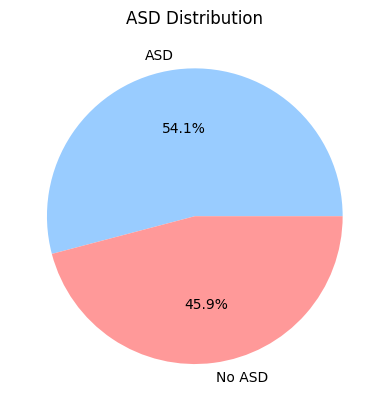

ASD: 1074 cases
No ASD: 911 cases
Gini Index: 0.50


In [36]:
# Create a mapping for labels
asd_labels = {1: 'ASD', 0: 'No ASD'}

# Calculate the counts
counts = encoded_data['ASD_traits'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=[asd_labels[label] for label in counts.index], autopct='%1.1f%%', colors=['#99CCFF', '#FF9999'])
ax.set_title('ASD Distribution')
plt.show()

# Print counts
for label, count in counts.items():
    print(f"{asd_labels[label]}: {count} cases")

# Calculate Gini Index
total = counts.sum()
gini_index = 1 - sum((count / total) ** 2 for count in counts)
print(f"Gini Index: {gini_index:.2f}")

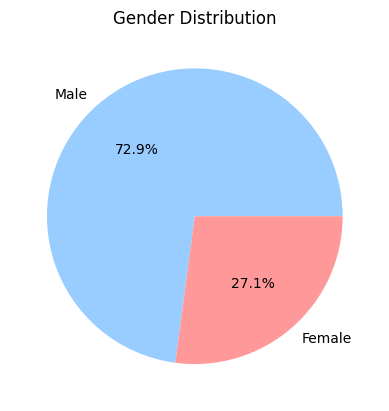

Male: 1447 cases
Female: 538 cases


In [37]:
# Create a mapping for labels
gender_labels = {1: 'Male', 0: 'Female'}

# Calculate the counts
counts = encoded_data['Sex_en'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=[gender_labels[label] for label in counts.index], autopct='%1.1f%%', colors=['#99CCFF', '#FF9999'])
ax.set_title('Gender Distribution')
plt.show()

# Print counts
for label, count in counts.items():
    print(f"{gender_labels[label]}: {count} cases")

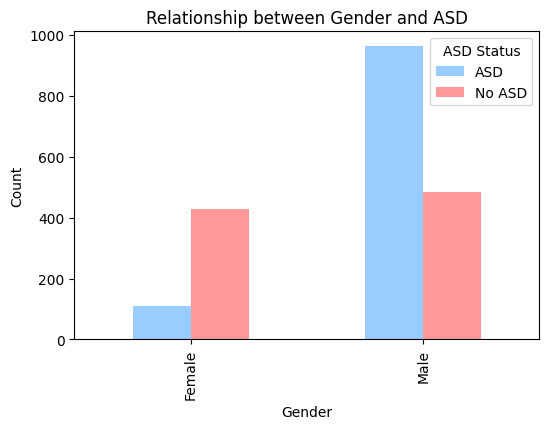

In [38]:
# Create a mapping for gender labels
gender_labels = {1: 'Male', 0: 'Female'}
asd_labels = {1: 'ASD', 0: 'No ASD'}

# Replace encoded values with labels for better readability
encoded_data['Sex_label'] = encoded_data['Sex_en'].replace(gender_labels)
encoded_data['ASD_label'] = encoded_data['ASD_traits'].replace(asd_labels)

# Calculate counts for each combination of gender and ASD status
gender_asd_counts = encoded_data.groupby(['Sex_label', 'ASD_label']).size().unstack()

# Plot a bar chart
gender_asd_counts.plot(kind='bar', color=['#99CCFF', '#FF9999'], figsize=(6, 4))
plt.title('Relationship between Gender and ASD')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='ASD Status')
plt.show()

# Drop the 'Sex_label' and 'ASD_label' columns
encoded_data = encoded_data.drop(columns=['Sex_label', 'ASD_label'])

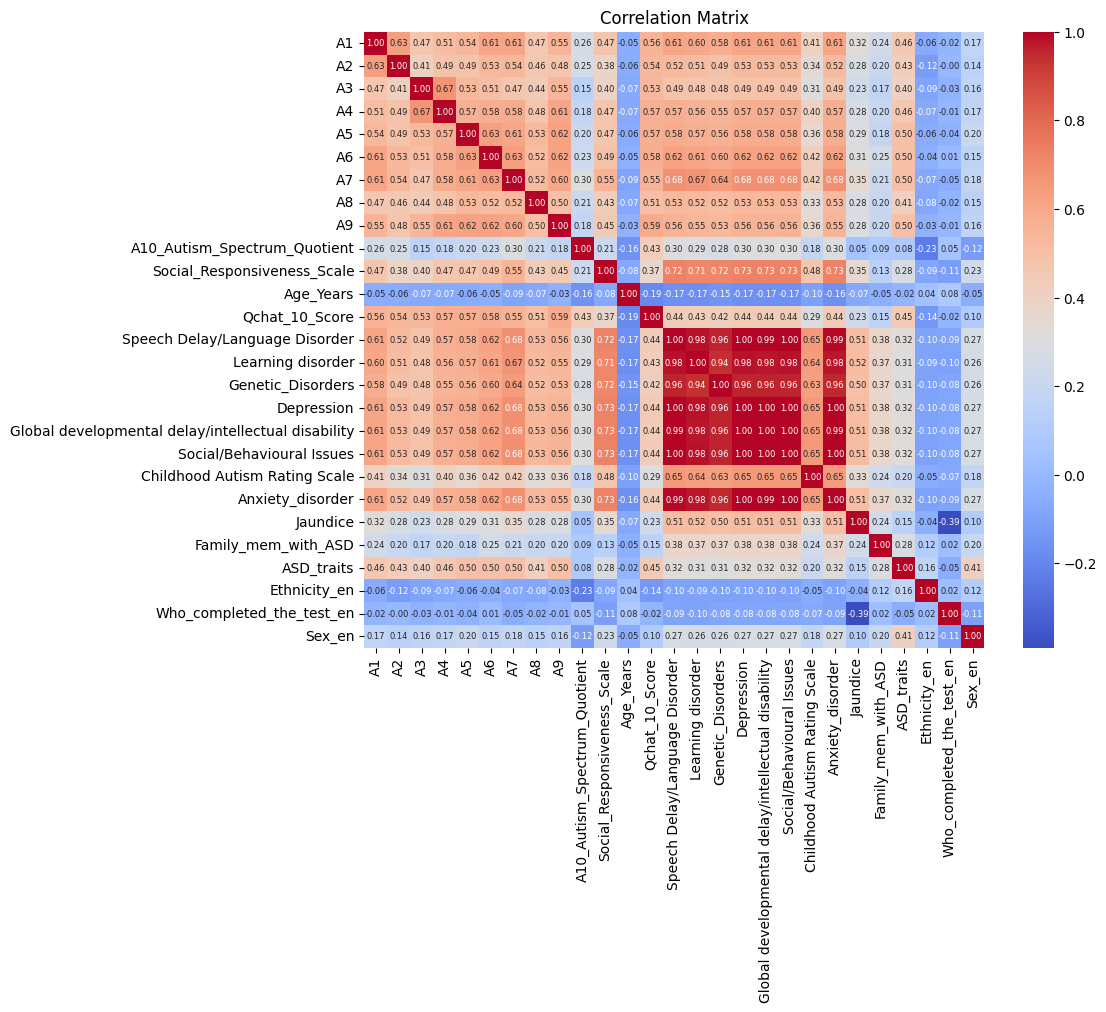

In [39]:
# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Calculate VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = encoded_data.columns
vif_data["VIF"] = [variance_inflation_factor(encoded_data.values, i) for i in range(encoded_data.shape[1])]

# Sort the VIF values in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                                              Feature          VIF
18                          Social/Behavioural Issues  2385.972668
16                                         Depression  1123.338033
17  Global developmental delay/intellectual disabi...   540.708084
13                     Speech Delay/Language Disorder   415.617284
20                                   Anxiety_disorder   353.660133
14                                  Learning disorder    64.868902
15                                  Genetic_Disorders    26.687709
25                          Who_completed_the_test_en     9.876480
12                                     Qchat_10_Score     8.101398
24                                       Ethnicity_en     7.819797
19                      Childhood Autism Rating Scale     6.454305
11                                          Age_Years     5.854439
21                                           Jaundice     5.774738
23                                         ASD_traits     4.97

In [41]:
# Identify columns with VIF > 10
high_vif_columns = vif_data_sorted[vif_data_sorted["VIF"] > 10]["Feature"]

# Drop columns with VIF > 10 from the dataset
encoded_data_reduced = encoded_data.drop(columns=high_vif_columns)

# Print the dropped columns
print("Dropped columns due to high VIF values (> 10):")
print(high_vif_columns.tolist())

# Calculate VIF values again
vif_data = pd.DataFrame()
vif_data["Feature"] = encoded_data_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(encoded_data_reduced.values, i) for i in range(encoded_data_reduced.shape[1])]

# Sort the VIF values in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

Dropped columns due to high VIF values (> 10):
['Social/Behavioural Issues', 'Depression', 'Global developmental delay/intellectual disability', 'Speech Delay/Language Disorder', 'Anxiety_disorder', 'Learning disorder', 'Genetic_Disorders']
                          Feature       VIF
18      Who_completed_the_test_en  9.793102
17                   Ethnicity_en  7.787725
12                 Qchat_10_Score  7.513800
13  Childhood Autism Rating Scale  5.601710
11                      Age_Years  5.581140
14                       Jaundice  5.163541
19                         Sex_en  4.656767
16                     ASD_traits  4.537429
6                              A7  3.851239
5                              A6  3.564481
3                              A4  3.441370
0                              A1  3.318559
4                              A5  3.176483
8                              A9  3.147922
10    Social_Responsiveness_Scale  3.116319
2                              A3  2.619390
1          

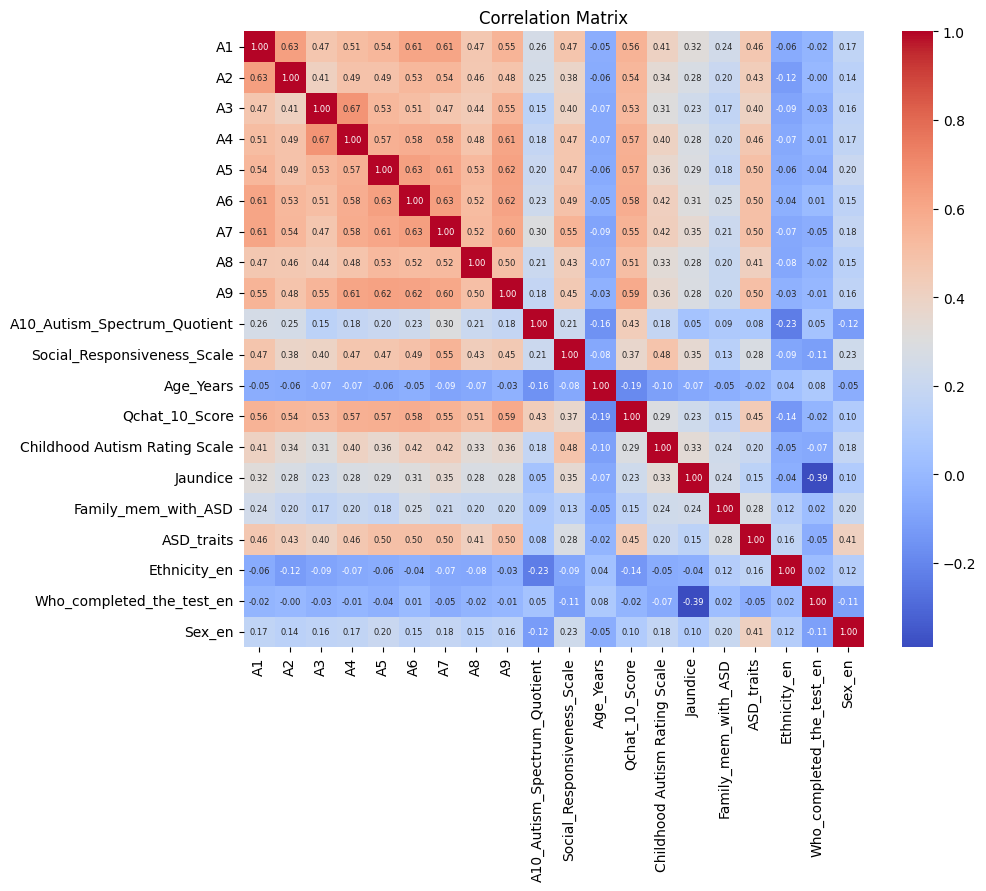

In [42]:
# Check the correlation matrix again
corr_matrix = encoded_data_reduced.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

***
## **5 Models**

1. **K-Nearest Neighbor**: Best parameters  found: `n_neighbors=7`, `weights='distance'` using **GridSearchCV**.
  
2. **Decision Tree**: Best parameters found: `max_depth=4`, `min_samples_split=2` using **GridSearchCV**.

3. **Support Vector Machine**: Best parameters found: `C=100`, `gamma='auto'`, `kernel='rbf'` using **GridSearchCV**.

4. **Gradient Boosting**: GradientBoostingClassifier with `n_estimators=100`.

5. **Random Forest**: RandomForestClassifier with `n_estimators=100`.

6. **Neural Network**: **Artificial Neural Network (ANN)** with **16 neurons** and **early stopping**. Trained with **Adam optimizer** (`learning_rate=0.01`).

In [43]:
# Separate features and target
X = encoded_data_reduced.drop('ASD_traits', axis=1)
y = encoded_data_reduced['ASD_traits']

# Split the data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Models and names
names = ['KNearestNeighbor', 
         'DecisionTreeClassifier', 
         'SupportVectorMachine']

# Define parameter grids for GridSearchCV
param_grids = [
    # KNN parameters to tune
    {'n_neighbors': range(2, 10), 'weights': ['uniform', 'distance']},
    
    # Decision Tree parameters to tune
    {'max_depth': range(2, 5), 'min_samples_split': [2, 5]},
    
    # SVM parameters to tune
    {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
]

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=1),
    SVC(random_state=1)
]

for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Setup GridSearchCV for the current model
    grid_search = GridSearchCV(model, param_grids[counter], cv=5)
    start_time = time.time()
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train_flat)
    end_time = time.time()
    
    # Use the best estimator found by GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = metrics.accuracy_score(y_test_flat, y_pred)

    # Calculate running time
    running_time = end_time - start_time

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test_flat, y_pred)
    
    print("-" * 60)
    print("Model:", names[counter])
    print("  Best Params:", grid_search.best_params_)
    print("  Accuracy:", format(accuracy, ".2f"))
    print("  Running Time (s):", format(running_time, ".2f"))
    print("  Confusion Matrix:\n", conf_matrix)

------------------------------------------------------------
Model: KNearestNeighbor
  Best Params: {'n_neighbors': 7, 'weights': 'distance'}
  Accuracy: 0.96
  Running Time (s): 2.86
  Confusion Matrix:
 [[171  11]
 [  6 209]]
------------------------------------------------------------
Model: DecisionTreeClassifier
  Best Params: {'max_depth': 4, 'min_samples_split': 2}
  Accuracy: 0.95
  Running Time (s): 0.34
  Confusion Matrix:
 [[171  11]
 [  7 208]]
------------------------------------------------------------
Model: SupportVectorMachine
  Best Params: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
  Accuracy: 0.97
  Running Time (s): 6.57
  Confusion Matrix:
 [[181   1]
 [  9 206]]


In [44]:
# Function to train and evaluate a classifier
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Start timer
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # End timer
    end_time = time.time()

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Calculate running time
    running_time = end_time - start_time

    # Evaluate confusion matrix
    y_pred = model.predict(X_test)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Print results
    print("-" * 30)
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Running Time (s): {running_time:.2f}")
    print("  Confusion Matrix:\n", confusion_matrix_result)
    
    # Return the model for further analysis if needed
    return model

# Initialize models
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Train and evaluate Gradient Boosting
gb_model = train_and_evaluate_model(gb_classifier, 'Gradient Boosting', X_train_std, X_test_std, y_train, y_test)

# Train and evaluate Random Forest
rf_model = train_and_evaluate_model(rf_classifier, 'Random Forest', X_train_std, X_test_std, y_train, y_test)

------------------------------
Model: Gradient Boosting
  Accuracy: 1.00
  Running Time (s): 0.51
  Confusion Matrix:
 [[182   0]
 [  0 215]]
------------------------------
Model: Random Forest
  Accuracy: 1.00
  Running Time (s): 0.42
  Confusion Matrix:
 [[182   0]
 [  0 215]]


In [45]:
# Set random state for reproducibility
tf.random.set_seed(1)

# Build an Artificial Neural Network (ANN) using TensorFlow and Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=X_train_std.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='binary_crossentropy', metrics=['accuracy'])

ann_start_time = time.time()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_std, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_test_std, y_test), 
                    callbacks=[early_stopping], verbose=0)

ann_end_time = time.time()

running_time = ann_end_time - ann_start_time

# Extract training and testing accuracies from history
training_acc = history.history['accuracy']
testing_acc = history.history['val_accuracy']

threshold = 0.5

# Calculate accuracy on the test set
ann_test = accuracy_score(y_test, (model.predict(X_test_std) > threshold).astype(int))

# Evaluate confusion matrix
y_pred = (model.predict(X_test_std) > threshold).astype(int)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("-" * 40)
print('ANN Model')
print('Accuracy: {:.2f}'.format(ann_test))
print('Running Time (s): {:.2f}'.format(running_time))
print('Confusion Matrix:\n', confusion_matrix_result)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
----------------------------------------
ANN Model
Accuracy: 1.00
Running Time (s): 15.86
Confusion Matrix:
 [[182   0]
 [  0 215]]


***
## **6 Results and Analysis**

1. **Feature Importance**: Using `feature_importances_`, the Random Forest model ranked **'Qchat_10_Score'**, **'Ethnicity'**, and **'Sex'** as the most important features for predicting ASD. **'Who_completed_the_test'** and **'Jaundice'** had minimal impact.

2. **Performance Comparisons**: Among the first three models, **SVM** has the best accuracy (0.97) but at the cost of a longer runtime. **Decision Tree** is the fastest but has the lowest accuracy (0.95), while **KNN** provides a balance between runtime and accuracy (0.96). In terms of models with perfect accuracy (1.00), **Gradient Boosting** and **Random Forest** offer the best performance in both accuracy and speed. **ANN** has slowest runtime overall.

3. **Evaluation Metrics**: For diagnosing ASD, the **F1-Score** and **Confusion Matrix** are the most suitable metrics because they allow you to balance the risks of **false positives** and **false negatives**, which are crucial in a medical context. **ROC-AUC** can be an additional measure to confirm the model's overall classification performance, especially if class imbalance is an issue.

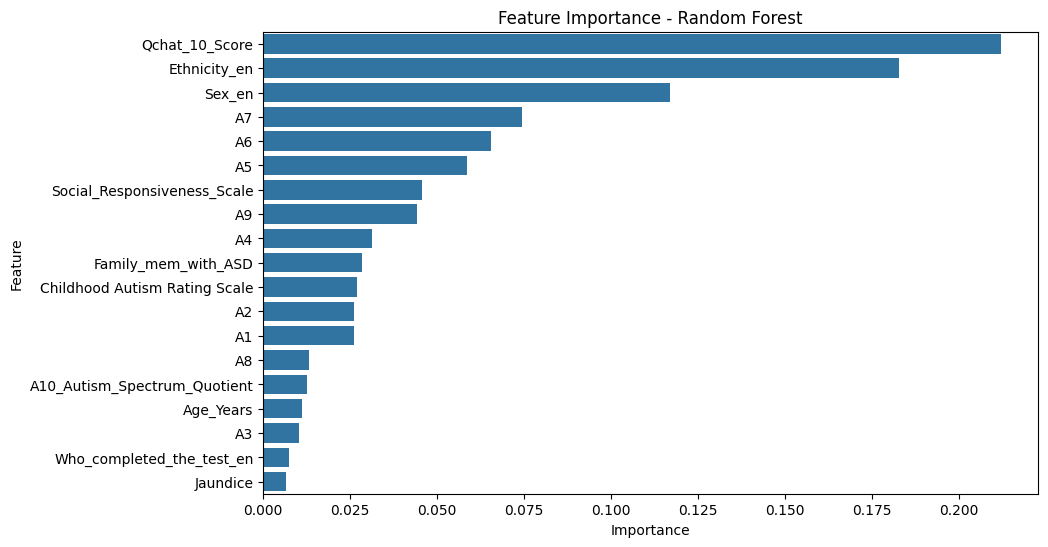

In [46]:
# Feature importance from Random Forest
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

In [47]:
# Function to calculate and display evaluation metrics
def evaluate_model_metrics(y_test, y_pred, y_proba, model_name):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print("-" * 30)
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  F1-Score: {f1:.2f}")
    print("  Confusion Matrix:\n", conf_matrix)
    print(f"  ROC-AUC: {roc_auc:.2f}")

# Loop through models
for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Setup GridSearchCV for the current model
    grid_search = GridSearchCV(model, param_grids[counter], cv=5)
    start_time = time.time()
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train_flat)
    end_time = time.time()
    
    # Use the best estimator found by GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # If model supports probability prediction, get probability estimates for ROC-AUC
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_proba = y_pred  # For models that don't support predict_proba
    
    # Evaluate metrics
    evaluate_model_metrics(y_test_flat, y_pred, y_proba, names[counter])

------------------------------
Model: KNearestNeighbor
  Accuracy: 0.96
  F1-Score: 0.96
  Confusion Matrix:
 [[171  11]
 [  6 209]]
  ROC-AUC: 0.99
------------------------------
Model: DecisionTreeClassifier
  Accuracy: 0.95
  F1-Score: 0.96
  Confusion Matrix:
 [[171  11]
 [  7 208]]
  ROC-AUC: 0.99
------------------------------
Model: SupportVectorMachine
  Accuracy: 0.97
  F1-Score: 0.98
  Confusion Matrix:
 [[181   1]
 [  9 206]]
  ROC-AUC: 0.98


In [48]:
# Model metrics data
model_names = ['KNearestNeighbor', 'DecisionTreeClassifier', 'SupportVectorMachine']
accuracies = [0.96, 0.95, 0.97]
f1_scores = [0.96, 0.96, 0.98]
roc_auc = [0.99, 0.99, 0.98]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1-Score': f1_scores,
    'ROC-AUC': roc_auc
})

# Use Pandas `style` to highlight the highest values in each column
styled_df = comparison_df.style.highlight_max(subset=['Accuracy', 'F1-Score', 'ROC-AUC'], color='lightgreen') \
    .format(precision=2) \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('font-weight', 'bold'), ('text-align', 'center')]
    }, {
        'selector': 'tbody td',
        'props': [('text-align', 'center')]
    }])
styled_df

,Model,Accuracy,F1-Score,ROC-AUC
0,KNearestNeighbor,0.96,0.96,0.99
1,DecisionTreeClassifier,0.95,0.96,0.99
2,SupportVectorMachine,0.97,0.98,0.98


***
## **7 Discussion and Conclusion**

### **Discussion**

1. **Learning and Takeaways**:

- Analyzing the **misclassified data points** across **KNearestNeighbor**, **DecisionTreeClassifier**, and **SupportVectorMachine** revealed that no data point was misclassified by all three models, highlighting each model’s complementary strengths and suggesting the potential for improvement through ensemble methods.

- Furthermore, the **feature importance** analysis identified **'Qchat_10_Score'**, **'Ethnicity'**, and **'Sex'** as the most important features in predicting ASD based on the Random Forest model, while the **correlation analysis** showed that **'A9'**, **'A6'**, and **'A7'** had the strongest correlations with **'ASD_traits'**. This discrepancy between feature importance and correlation underscores that models may rely on more complex relationships, providing valuable insights for model interpretation.

2. **Why Something Didn’t Work**:

- The **feature importance** analysis ranked **'Ethnicity'** highly, but from a **domain knowledge** perspective, it is not a direct predictor of ASD. This suggests the model may be overfitting to patterns in the data that are not medically relevant, introducing bias. **'Ethnicity'** might correlate with other social factors but lacks causal significance. To address this, **feature selection** should be used to remove features like **'Ethnicity'** despite their importance in the model, ensuring decisions are based on relevant medical factors.

3. **Suggestions for Improvement**:

- **Misclassified Data Points**: Since different models misclassify different data points, using an ensemble approach (e.g., **voting** or **stacking**) could correct errors. Analyzing misclassified points can also guide improvements in feature engineering and preprocessing.

- **Feature Selection and Engineering**: Features like **'Who_completed_the_test'**, **'Ethnicity'**, **'Jaundice'**, and **'Age_Years'** may introduce bias and could be removed. Improving model performance could involve combining behavioral scores, binning age, creating interaction terms, and using **Recursive Feature Elimination (RFE)** for feature selection.

In [49]:
# Display the top 3 important features
top_3_features_importance = feature_importance_df.head(3)
print("Top 3 important features:")
print(top_3_features_importance)
print("-" * 50)

# Extract top 3 features with the highest correlation to ASD_traits (excluding ASD_traits itself)
top_3_corr_with_target = corr_matrix['ASD_traits'].abs().sort_values(ascending=False).head(4)[1:]  # Exclude ASD_traits
print("\nTop 3 features most correlated with ASD_traits:")
print(top_3_corr_with_target)

Top 3 important features:
           Feature  Importance
12  Qchat_10_Score    0.212059
16    Ethnicity_en    0.182816
18          Sex_en    0.117025
--------------------------------------------------

Top 3 features most correlated with ASD_traits:
A9    0.502053
A6    0.500133
A7    0.496292
Name: ASD_traits, dtype: float64


In [50]:
# Loop through models and store best estimators
best_models = []
for model_name, model, param_grid in zip(['KNearestNeighbor', 'DecisionTreeClassifier', 'SupportVectorMachine'], 
                                         [KNeighborsClassifier(), DecisionTreeClassifier(random_state=1), SVC(random_state=1, probability=True)], 
                                         param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)  # Fit the model
    best_models.append(grid_search.best_estimator_)  # Store the best model

# Now use these models for misclassification comparison
misclassified_indices = {}

# Loop through each model, predict, and store indices of misclassified data points
for model_name, model in zip(['KNearestNeighbor', 'DecisionTreeClassifier', 'SupportVectorMachine'], best_models):
    y_pred = model.predict(X_test)  # Get predictions
    
    # Find the indices where predictions don't match the true labels
    misclassified = np.where(y_pred != y_test)[0]  # Indices of misclassified points
    
    # Store the misclassified indices in a dictionary
    misclassified_indices[model_name] = misclassified
    print(f"{model_name} misclassified data points: {misclassified}")

# Compare misclassified indices across models
misclassified_knn = set(misclassified_indices['KNearestNeighbor'])
misclassified_dt = set(misclassified_indices['DecisionTreeClassifier'])
misclassified_svm = set(misclassified_indices['SupportVectorMachine'])

# Find common misclassified points
common_misclassified = misclassified_knn & misclassified_dt & misclassified_svm

if len(common_misclassified) > 0:
    print(f"Common misclassified data points across all models: {common_misclassified}")
else:
    print("-" * 60)
    print("No common misclassified data points across all three models.")

KNearestNeighbor misclassified data points: [ 12  19  33  53  55  69  99 137 154 169 184 228 291 342 347 367 379]
DecisionTreeClassifier misclassified data points: [ 24  35  36  39  53  80  96 111 153 197 229 277 320 332 357 375 385 388]
SupportVectorMachine misclassified data points: [ 39  55  89 148 184 320 346 379 383 392]
------------------------------------------------------------
No common misclassified data points across all three models.


### **Conclusion**

In this project, I explored multiple models for predicting ASD, including KNN, DecisionTree, SVM, Gradient Boosting, Random Forest, and ANN. Gradient Boosting and Random Forest achieved perfect accuracy and speed, while SVM showed strong performance with a balance of accuracy and speed. Feature importance analysis highlighted Qchat_10_Score, Ethnicity, and Sex as key predictors, though domain knowledge suggests features like Ethnicity may introduce bias. By leveraging ensemble methods and refining features through feature selection and engineering, the model’s accuracy and relevance to ASD diagnosis can be further enhanced.

GitHub Repository Link: https://github.com/d93xup60126/Supervised_Learning_ASD_Prediction

***